In [ ]:
!pip install transformers datasets huggingface_hub
from transformers import pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
classifier = pipeline("sentiment-analysis")
result = classifier("It is bad")[0]
print(f"Label: {result['label']}, Confidence: {result['score']:.4f}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Label: NEGATIVE, Confidence: 0.9998


In [ ]:
from datasets import load_dataset
#get only test data
test_data = load_dataset("imdb", split="test")


In [ ]:
import pandas as pd
df = pd.DataFrame(test_data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
#get first 100 line
sample_reviews = [test_data[i]['text'] for i in range(100)]
#metni kisaltma
results = classifier(sample_reviews, truncation=True, max_length=512)

In [ ]:
import matplotlib.pyplot as plt
# Pozitif ve negatif analiz sayısını hesapla
positive_count = sum(1 for r in results if r['label'] == 'POSITIVE')
negative_count = sum(1 for r in results if r['label'] == 'NEGATIVE')


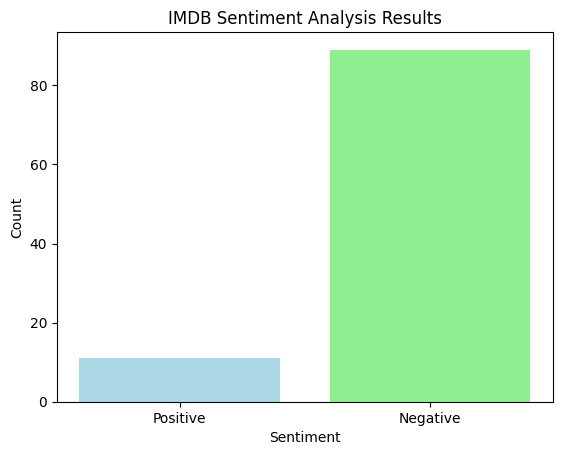

In [ ]:
# Grafiği oluştur
labels = ['Positive', 'Negative']
scores = [positive_count, negative_count]

plt.bar(labels, scores, color=['lightblue', 'lightgreen'])
plt.title('IMDB Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()